In [436]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [437]:
df = pd.read_csv('/kaggle/input/football-5/College Football - Sheet1 (4).csv')

In [438]:
#Cleaning Data
def clean_and_convert_currency(currency):
    try:
        cleaned_value = float(currency.replace('$', '').replace(',', ''))
        return cleaned_value
    except:
        return None

df['Football Revenue'] = df['Football Revenue'].apply(clean_and_convert_currency)
df['Undergrad Enrollment'] = df['Undergrad Enrollment'].apply(clean_and_convert_currency)
df['Football Attendence'] = df['Football Attendence'].apply(clean_and_convert_currency)
df['Stadium Size'] = df['Stadium Size'].apply(clean_and_convert_currency)
df['Football Profit'] = df['Football Profit'].apply(clean_and_convert_currency)
df['Football Expenses'] = df['Football Expenses'].apply(clean_and_convert_currency)
df['Basketball Revenue'] = df['Basketball Revenue'].apply(clean_and_convert_currency)
df['Basketball Profit'] = df['Basketball Profit'].apply(clean_and_convert_currency)
df['Basketball Expenses'] = df['Basketball Expenses'].apply(clean_and_convert_currency)
df['Win Rate'] = df['Win Rate'].astype(str)
df['Win Rate'] = df['Win Rate'].str.rstrip('%').astype(float)
df['Wins/Years'] = df['All Time Wins']/df['Years Played']
df.dtypes

Rank                      int64
School                   object
State                    object
City                     object
Win Rate                float64
Conference               object
Football Revenue        float64
Football Profit         float64
Football Expenses       float64
Undergrad Enrollment    float64
Football Attendence     float64
Stadium Size            float64
% Fraternity            float64
% Sorority              float64
Basketball Revenue      float64
Basketball Profit       float64
Basketball Expenses     float64
All Time Wins             int64
Average Ticket Price      int64
Years Played              int64
State GDP M               int64
GDP Per Capita            int64
Wins/Years              float64
dtype: object

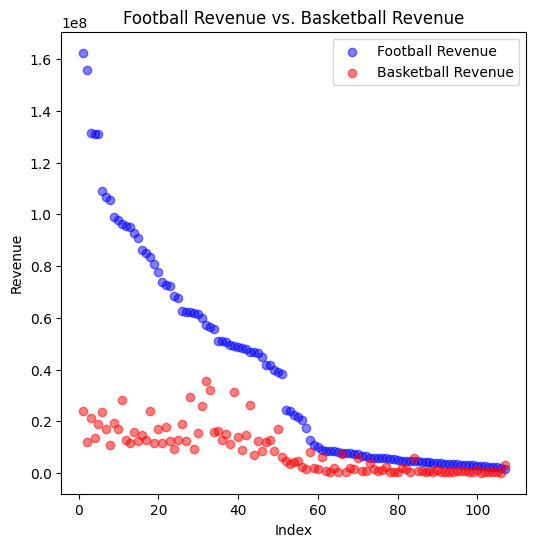

In [439]:
#Football Revenue vs. Basketball Revenue

x = df['Rank']

plt.figure(figsize=(6, 6))
plt.scatter(x, df['Football Revenue'], marker='o', color='b', alpha=0.5, label='Football Revenue')
plt.scatter(x, df['Basketball Revenue'], marker='o', color='r', alpha=0.5, label='Basketball Revenue')

plt.title('Football Revenue vs. Basketball Revenue')
plt.xlabel('Index')
plt.ylabel('Revenue')
plt.legend()
plt.show()


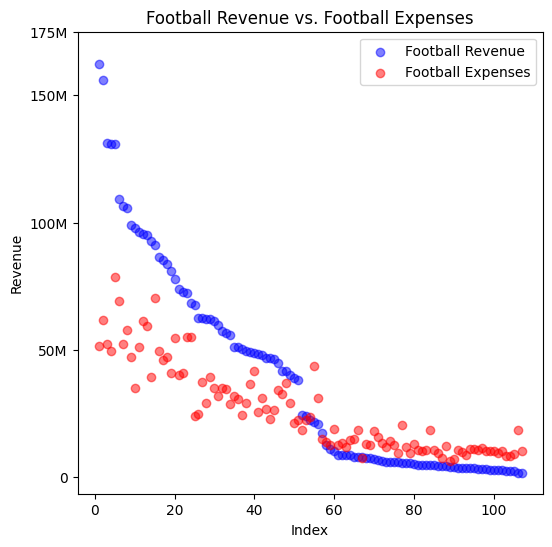

In [440]:
#Football Revenue vs. Football Expenses

x = df['Rank']

plt.figure(figsize=(6, 6))
plt.scatter(x, df['Football Revenue'], marker='o', color='b', alpha=0.5, label='Football Revenue')
plt.scatter(x, df['Football Expenses'], marker='o', color='r', alpha=0.5, label='Football Expenses')

y_tick_positions = [0, 50000000, 100000000, 150000000, 175000000]
y_tick_labels = ["0", "50M", "100M", "150M", '175M']
plt.yticks(y_tick_positions, y_tick_labels)

plt.title('Football Revenue vs. Football Expenses')
plt.xlabel('Index')
plt.ylabel('Revenue')
plt.legend()
plt.show()


0.4861726758404888


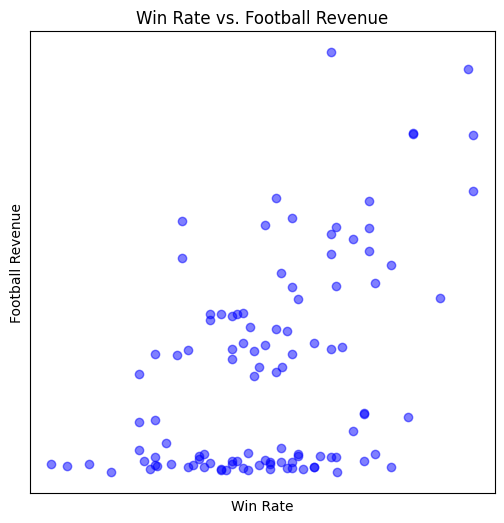

In [441]:
#Win Rate vs. Football Revenue

x = df['Win Rate']
y = df['Football Revenue']

plt.figure(figsize=(6, 6))
plt.scatter(x,y, marker='o', color='b', alpha=0.5)
plt.title('Win Rate vs. Football Revenue')
plt.xlabel('Win Rate')
plt.ylabel('Football Revenue')
plt.xticks([]) 
plt.yticks([])  

print(x.corr(df['Football Revenue']))
plt.show()

0.871688841193843


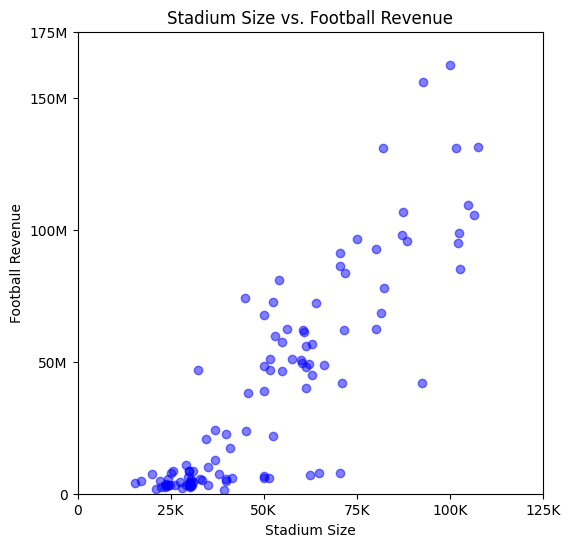

In [442]:
#Stadium Size vs. Football Revenue

x = df['Stadium Size']
y = df['Football Revenue']

plt.figure(figsize=(6, 6))
plt.scatter(x, y, marker='o', color='b', alpha=0.5)
plt.title('Stadium Size vs. Football Revenue')
plt.xlabel('Stadium Size')
plt.ylabel('Football Revenue')

plt.xlim(0, 100000)  # Set x-axis limits
plt.ylim(0, 165000000)  # Set y-axis limits

x_tick_positions = [0, 25000, 50000, 75000, 100000,125000]
x_tick_labels = ["0", "25K", "50K", "75K", "100K", '125K']
plt.xticks(x_tick_positions, x_tick_labels)

y_tick_positions = [0, 50000000, 100000000, 150000000, 175000000]
y_tick_labels = ["0", "50M", "100M", "150M", '175M']
plt.yticks(y_tick_positions, y_tick_labels)

print(x.corr(df['Football Revenue']))
plt.show()

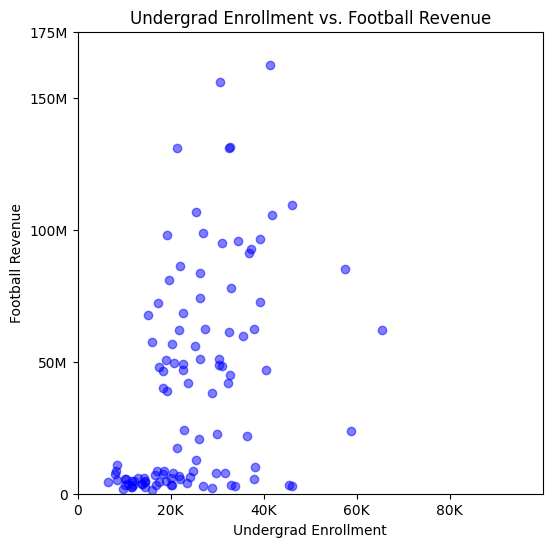

In [443]:
#Undergrad Enrollment vs. Football Revenue

x = df['Undergrad Enrollment']
y = df['Football Revenue']

plt.figure(figsize=(6, 6))
plt.scatter(x, y, marker='o', color='b', alpha=0.5)
plt.title('Undergrad Enrollment vs. Football Revenue')
plt.xlabel('Undergrad Enrollment')
plt.ylabel('Football Revenue')

plt.xlim(0, 100000)
plt.ylim(0, 165000000)

x_tick_positions = [0, 20000, 40000, 60000, 80000]
x_tick_labels = ["0", "20K", "40K", "60K", "80K"]
plt.xticks(x_tick_positions, x_tick_labels)

y_tick_positions = [0, 50000000, 100000000, 150000000, 175000000]
y_tick_labels = ["0", "50M", "100M", "150M", '175M']
plt.yticks(y_tick_positions, y_tick_labels)

plt.show()

0.7121711093633518


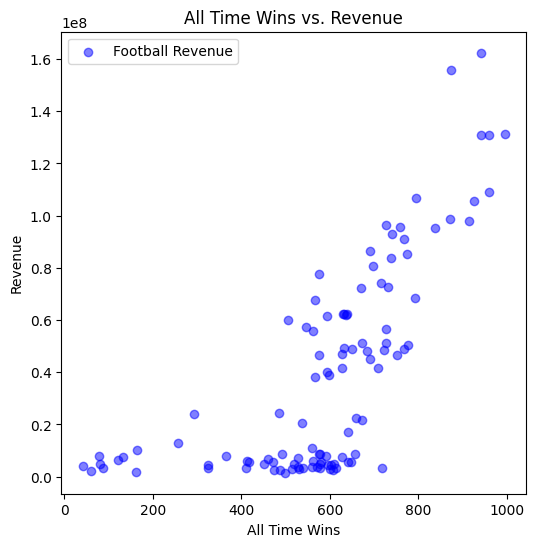

In [444]:
#All Time Wins vs. Revenue

x = df['All Time Wins']
y = df['Football Revenue']
plt.figure(figsize=(6, 6))
plt.scatter(x, y, marker='o', color='b', alpha=0.5, label='Football Revenue')

plt.title('All Time Wins vs. Revenue')
plt.xlabel('All Time Wins')
plt.ylabel('Revenue')
plt.legend()

print(x.corr(df['Football Revenue']))
plt.show()

Correlation coefficient of Basketball & Football Revenue: 0.7485436589804211


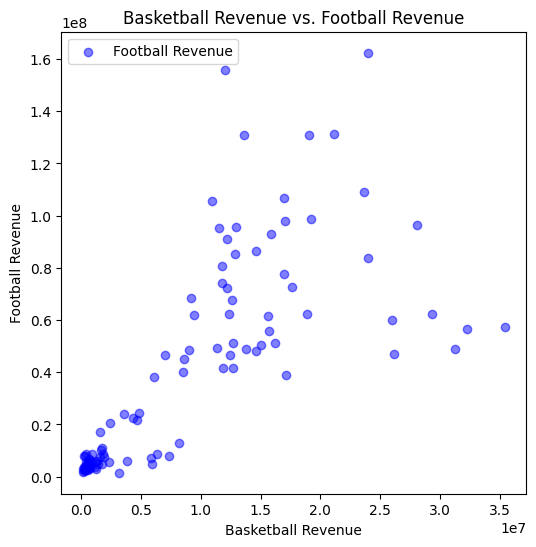

In [445]:
#Basketball Revenue vs. Football Revenue

x = df['Basketball Revenue']
y = df['Football Revenue']
plt.figure(figsize=(6, 6))
plt.scatter(x, y, marker='o', color='b', alpha=0.5, label='Football Revenue')

plt.title('Basketball Revenue vs. Football Revenue')
plt.xlabel('Basketball Revenue')
plt.ylabel('Football Revenue')
plt.legend()

print("Correlation coefficient of Basketball & Football Revenue:", x.corr(y))
plt.show()

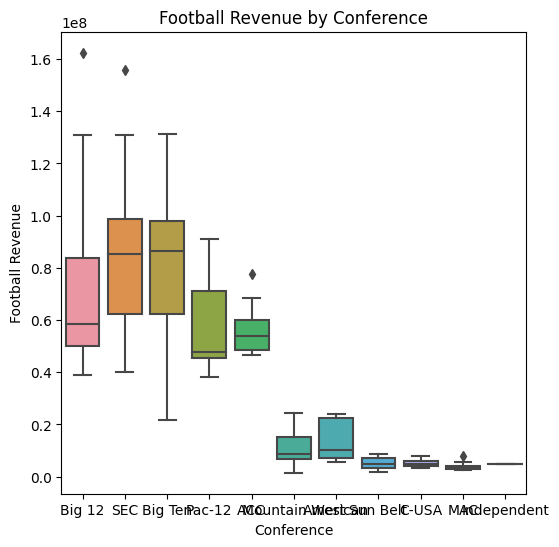

In [446]:
#Box Plots of Football Revenue By Conference

plt.figure(figsize=(6, 6))
sns.boxplot(data=df, x='Conference', y='Football Revenue')
plt.title('Football Revenue by Conference')
plt.xlabel('Conference')
plt.ylabel('Football Revenue')
plt.show()

In [447]:
#Label Encoding "Conference" column
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Conference_Label'] = label_encoder.fit_transform(df['Conference'])

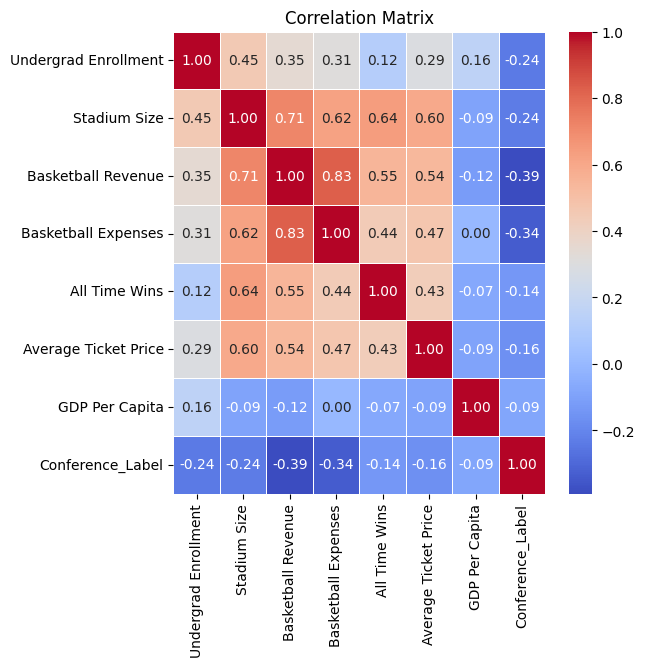

In [448]:
# Plotting the correlation matrix using Seaborn

correlation_matrix = X_train.corr()
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [449]:
#Dropping irrelevant or too-highly coorelated variables

df = df.drop(['Football Profit','Football Attendence','Football Expenses','% Fraternity', '% Sorority', 'School', 'Rank','Conference','State','City','Years Played','Wins/Years','State GDP M','Win Rate','Basketball Profit'], axis = 1)

In [450]:
#Min/Max Scaling Continuous Variables

continuous_vars = ['Basketball Expenses','Basketball Revenue','Undergrad Enrollment','Stadium Size','Average Ticket Price', 'GDP Per Capita','Conference_Label']
minVec = df[continuous_vars].min().copy()
maxVec = df[continuous_vars].max().copy()
df[continuous_vars] = (df[continuous_vars]-minVec)/(maxVec-minVec)

In [451]:
#Splitting into training and testing sets

df_train , df_test = df, df
df_train = df_train.sample(frac=0.8,random_state=200)
df_test = df_test.drop(df_train.index)

In [452]:
X_train = df_train.drop(['Football Revenue'],axis = 1)
Y_train = df_train['Football Revenue']
X_test = df_test.drop(['Football Revenue'],axis = 1)
Y_test = df_test['Football Revenue']

In [453]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, LassoCV, Lasso, ElasticNetCV, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import plot_importance, XGBClassifier

In [454]:
#Linear Regression

param_grid = {'fit_intercept': [True, False]}
linear_reg_Grid = GridSearchCV(LinearRegression(), param_grid, cv=10, refit=True, verbose=0)
linear_reg_Grid.fit(df_train.loc[:, df_train.columns != 'Football Revenue'], df_train['Football Revenue'])

best_model = linear_reg_Grid.best_estimator_

lin_reg = best_model.predict(df_test.loc[:, df_test.columns != 'Football Revenue'])

r2 = r2_score(df_test['Football Revenue'], lin_reg)
mae = mean_absolute_error(df_test['Football Revenue'], lin_reg)

print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")

R-squared: 0.7706242351640544
Mean Absolute Error: 14014641.250650287


In [455]:
#Ridge Regression

model = Ridge(alpha=1.0, max_iter=10000)
model.fit(X_train, Y_train)

rid_reg = model.predict(X_test)

r2 = r2_score(df_test['Football Revenue'], rid_reg)
mae = mean_absolute_error(df_test['Football Revenue'], rid_reg)

print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")

R-squared: 0.7590028030121013
Mean Absolute Error: 14650624.688703533


In [456]:
#Lasso Regression

lasso_cv = LassoCV(alphas=[0.1, 0.5, 1.0, 10, 50, 100], cv=5, max_iter=100000)
lasso_cv.fit(X_train, Y_train)

best_alpha = lasso_cv.alpha_

model = Lasso(alpha=best_alpha)
model.fit(X_train, Y_train)

las_reg = model.predict(X_test)

r2 = r2_score(df_test['Football Revenue'], las_reg)
mae = mean_absolute_error(df_test['Football Revenue'], las_reg)

print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")

R-squared: 0.7706344904912438
Mean Absolute Error: 14014793.52178399


In [457]:
#Elastic Net Regression

elasticnet_cv = ElasticNetCV(alphas=[0.1, 1.0, 10, 50, 100], l1_ratio=[0.1, 0.5, 0.7, 0.9], cv=5, max_iter=100000)
elasticnet_cv.fit(X_train, Y_train)

best_alpha = elasticnet_cv.alpha_
best_l1_ratio = elasticnet_cv.l1_ratio_

model = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio, max_iter=100000)
model.fit(X_train, Y_train)

ela_net = model.predict(X_test)

r2 = r2_score(df_test['Football Revenue'], ela_net)
mae = mean_absolute_error(df_test['Football Revenue'], ela_net)

print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")

R-squared: 0.7611402338145773
Mean Absolute Error: 14558724.3906052


In [458]:
#Decision Tree

decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, Y_train)

dec_tree = decision_tree.predict(X_test)

r2 = r2_score(df_test['Football Revenue'], dec_tree)
mae = mean_absolute_error(df_test['Football Revenue'], dec_tree)

print(f"Decision Tree R-squared: {r2}")
print(f"Decision Tree Mean Absolute Error: {mae}")

Decision Tree R-squared: 0.6706007087148673
Decision Tree Mean Absolute Error: 17267623.85714286


In [459]:
#Random Forest Regression

random_forest = RandomForestRegressor(n_estimators=100, random_state=0)
random_forest.fit(X_train, Y_train)

ran_for = random_forest.predict(X_test)

r2 = r2_score(df_test['Football Revenue'], ran_for)
mae = mean_absolute_error(df_test['Football Revenue'], ran_for)

print(f"Random Forest R-squared: {r2}")
print(f"Random Forest Mean Absolute Error: {mae}")

Random Forest R-squared: 0.8282283996666115
Random Forest Mean Absolute Error: 12530537.482857142


In [460]:
#Gradient Boosting Regression

gradient_boosting = GradientBoostingRegressor(n_estimators=100, random_state=0)
gradient_boosting.fit(X_train, Y_train)

grad_boost = gradient_boosting.predict(X_test)

r2 = r2_score(df_test['Football Revenue'], grad_boost)
mae = mean_absolute_error(df_test['Football Revenue'], grad_boost)

print(f"Gradient Boosting R-squared: {r2}")
print(f"Gradient Boosting Mean Absolute Error: {mae}")

y_pred_train = gradient_boosting.predict(X_train)

r2 = r2_score(Y_train, y_pred_train)
mae = mean_absolute_error(Y_train, y_pred_train)

print(f"Gradient Boosting R-squared for training data: {r2}")
print(f"Gradient Boosting Mean Absolute Error for training data: {mae}")

Gradient Boosting R-squared: 0.838128835575833
Gradient Boosting Mean Absolute Error: 11162311.311347816
Gradient Boosting R-squared for training data: 0.9990215051090854
Gradient Boosting Mean Absolute Error for training data: 943294.6254858031


Very high R-squared for training data and lower R-squared for testing implies we are likely overfitting the data

In [461]:
#XGBoost

dtrain = xgb.DMatrix(X_train, label=Y_train)
dtrainx = xgb.DMatrix(X_train)
dtest = xgb.DMatrix(X_test)

param = {
    'max_depth': 5,
    'eta': 0.1,
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'min_child_weight': 1,
    'gamma': 0.1,
    'scale_pos_weight':1,
    'alpha': 0.5,
    'lambda': 1.0
}
bst = xgb.train(param, dtrain, num_boost_round=100)

xg_boost = bst.predict(dtest)

r2 = r2_score(df_test['Football Revenue'], xg_boost)
mae = mean_absolute_error(df_test['Football Revenue'], xg_boost)

print(f"R-squared for test data: {r2}")
print(f"Mean Absolute Error for test data: {mae}")

R-squared for test data: 0.8240818047735199
Mean Absolute Error for test data: 11226127.19047619


In [462]:
mean_values = (grad_boost +xg_boost) / 2

r2 = r2_score(df_test['Football Revenue'], mean_values)
mae = mean_absolute_error(df_test['Football Revenue'], mean_values)

print(f"Averaged R-squared: {r2}")
print(f"Averaged Mean Absolute Error: {mae}")

Averaged R-squared: 0.8341573314420654
Averaged Mean Absolute Error: 11073702.033524409


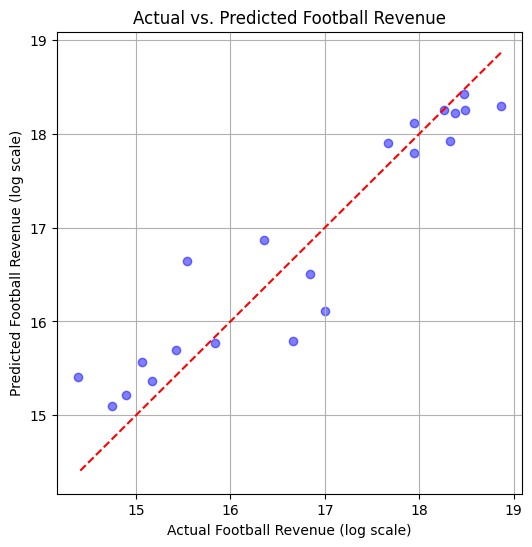

In [463]:
x=np.log(df_test['Football Revenue'])
y=np.log(mean_values)

plt.figure(figsize=(6, 6))
plt.scatter(x, y, marker='o', color='b', alpha=0.5, label='Football Revenue')
plt.plot(x, x, color='r', linestyle='--', label='y = x')

plt.xlabel('Actual Football Revenue (log scale)')
plt.ylabel('Predicted Football Revenue (log scale)')
plt.title('Actual vs. Predicted Football Revenue')

plt.grid()
plt.show()

In [464]:
dfUCSB = pd.read_csv("/kaggle/input/ucsb-2/UCSB Info - Sheet1.csv")
dtrain = xgb.DMatrix(df.drop(['Football Revenue'],axis = 1), label=df['Football Revenue'])
dfinal = xgb.DMatrix(dfUCSB)

param = {'max_depth': 3,'eta': 0.1,'objective': 'reg:squarederror','eval_metric': 'rmse','subsample': 0.8, 'colsample_bytree': 0.8,  }

bst = xgb.train(param, dtrain, num_boost_round=100)

gradient_boosting = GradientBoostingRegressor(n_estimators=100, random_state=0)
gradient_boosting.fit(df.drop(['Football Revenue'], axis=1), df['Football Revenue'])

y_pred_grad = gradient_boosting.predict(dfUCSB)

y_pred_bst = bst.predict(dfinal)

meanVal = (y_pred_bst+y_pred_grad)/2
formatted_meanVal = "{:,}".format(round(meanVal[0], 2))
print("Predicted Revenue Generated by UCSB Football Program: $", formatted_meanVal)

Predicted Revenue Generated by UCSB Football Program: $ 61,465,332.77
